# 머신러닝 기본요소
1. 일반화(머신러닝의 목표)
2. 머신러닝 모델 평가
3. 훈련성능 향샹
4. 일반화 성능 향상
5. 요약

## 1. 일반화
**일반화** : 훈련된 모델이 처음 본 데이터에서 얼마나 좋은 성능이 나오는지   
**최적화** : Train데이터에서 최고의 성능을 얻기위해 모델을 조정하는 과정

### 과대 적합과 과소 적합
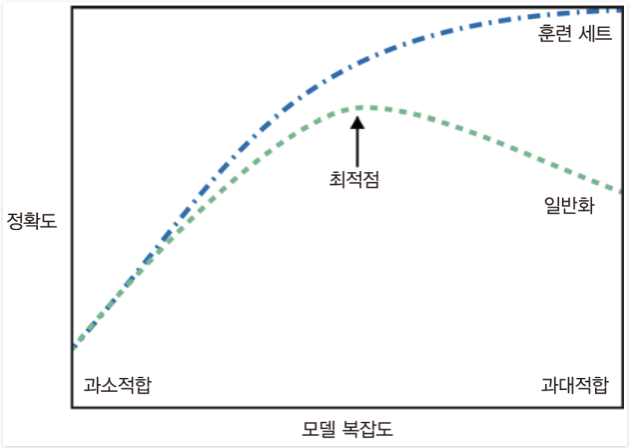  


**과소적합**은 최적화가 제대로 수행되지 않아 학습 데이터의 구조/패턴을 정확히 반영하지 못하는 문제  
과소적합은 모델의 복잡도를 높이므로서 해결 가능함.  


**과대적합**은 머신러닝 모델을 학습할 때 학습 데이터셋에 지나치게 최적화하여 발생하는 문제  
과대적합은 데이터에 잡음을 없애거나, 학습을 조기중단하는 방법으로 해결 가능함.

### 잡음 추가 후 모델 훈련

In [4]:
from tensorflow.keras.datasets import mnist
import numpy as np
(train,train_label),_=mnist.load_data()

백색잡음과 0값을 가진 픽셀 임의 추가

In [5]:
train=train.reshape(60000,28*28)
train=train.astype('float32')/255
train_noise=np.concatenate([train,np.random.random((len(train),28*28))],axis=1)
train_zeros=np.concatenate([train,np.zeros((len(train),28*28))],axis=1)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
def make_model():
    model=keras.Sequential([
        layers.Dense(512,activation='relu'),
        layers.Dense(10,activation='softmax')
    ])
    model.compile(optimizer='rmsprop',
                 loss='sparse_categorical_crossentropy',
                 metrics='accuracy')
    return model

In [9]:
model_noise=make_model()
history1=model_noise.fit(train_noise,train_label,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 10s 24ms/step - loss: 0.6059 - accuracy: 0.8134 - val_loss: 0.2453 - val_accuracy: 0.9254
Epoch 2/10
375/375 [==============================] - 9s 23ms/step - loss: 0.2458 - accuracy: 0.9230 - val_loss: 0.2072 - val_accuracy: 0.9386
Epoch 3/10
375/375 [==============================] - 9s 23ms/step - loss: 0.1587 - accuracy: 0.9508 - val_loss: 0.1418 - val_accuracy: 0.9576
Epoch 4/10
375/375 [==============================] - 9s 23ms/step - loss: 0.1135 - accuracy: 0.9649 - val_loss: 0.1459 - val_accuracy: 0.9578
Epoch 5/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0820 - accuracy: 0.9738 - val_loss: 0.1280 - val_accuracy: 0.9626
Epoch 6/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0623 - accuracy: 0.9805 - val_loss: 0.1281 - val_accuracy: 0.9658
Epoch 7/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0454 - accuracy: 0.9857 - val_loss: 0.1272 - val_accuracy: 0.965

In [10]:
model_zeros=make_model()
history2=model_zeros.fit(train_noise,train_label,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 10s 23ms/step - loss: 0.6270 - accuracy: 0.8109 - val_loss: 0.2868 - val_accuracy: 0.9108
Epoch 2/10
375/375 [==============================] - 9s 23ms/step - loss: 0.2466 - accuracy: 0.9235 - val_loss: 0.2838 - val_accuracy: 0.9127
Epoch 3/10
375/375 [==============================] - 9s 23ms/step - loss: 0.1591 - accuracy: 0.9505 - val_loss: 0.1414 - val_accuracy: 0.9573
Epoch 4/10
375/375 [==============================] - 9s 23ms/step - loss: 0.1138 - accuracy: 0.9638 - val_loss: 0.1415 - val_accuracy: 0.9572
Epoch 5/10
375/375 [==============================] - 8s 23ms/step - loss: 0.0835 - accuracy: 0.9736 - val_loss: 0.1387 - val_accuracy: 0.9596
Epoch 6/10
375/375 [==============================] - 8s 23ms/step - loss: 0.0620 - accuracy: 0.9801 - val_loss: 0.1231 - val_accuracy: 0.9648
Epoch 7/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0461 - accuracy: 0.9848 - val_loss: 0.1223 - val_accuracy: 0.965

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
noise_df=pd.DataFrame(history1.history,columns=history1.history.keys())
zeros_df=pd.DataFrame(history2.history,columns=history2.history.keys())

Text(0, 0.5, 'Accuracy')

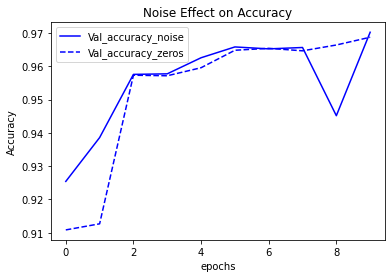

In [19]:
plt.plot(noise_df.index,noise_df.val_accuracy,'b-',label='Val_accuracy_noise')
plt.plot(zeros_df.index,zeros_df.val_accuracy,'b--',label='Val_accuracy_zeros')
plt.title('Noise Effect on Accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Accuracy')

잡음이 섞인 데이터에서 성능이 더 낮음. 잡음이 많이 섞일수록 성능의 차이는 점점 더 많이 나게 됨.

### 딥러닝 일반화의 본질
MNIST데이터를 섞은 후 모델을 훈련할 때, 딥러닝 모델이 입력과 뒤섞인 레이블 사이에 관계가 없더라도 비교적 작은 모델에서도 훈련 손실이 감소 하는 경향을 보임. 하지만 가능한 일반화가 없기 때문에 검증 손실은 epochs가 지남에 따라 향상되지않음.  
레이블이 뒤섞이더라도 어떤것에도 맞춰지도록 훈련이 가능한 것이 딥러닝 일반화의 핵심

In [22]:
(train,train_label),_=mnist.load_data()
train=train.reshape(60000,28*28)
train=train.astype('float32')/255

In [25]:
rand_train_labels=train_label[:]
np.random.shuffle(rand_train_labels)
model3=make_model()
history3=model3.fit(train,rand_train_labels,
          epochs=50,
          batch_size=128,
          validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 7s 15ms/step - loss: 2.3163 - accuracy: 0.1044 - val_loss: 2.3093 - val_accuracy: 0.1100
Epoch 2/50
375/375 [==============================] - 5s 14ms/step - loss: 2.2999 - accuracy: 0.1165 - val_loss: 2.3148 - val_accuracy: 0.0977
Epoch 3/50
375/375 [==============================] - 5s 14ms/step - loss: 2.2900 - accuracy: 0.1261 - val_loss: 2.3196 - val_accuracy: 0.0997
Epoch 4/50
375/375 [==============================] - 5s 14ms/step - loss: 2.2755 - accuracy: 0.1429 - val_loss: 2.3277 - val_accuracy: 0.1058
Epoch 5/50
375/375 [==============================] - 5s 14ms/step - loss: 2.2581 - accuracy: 0.1552 - val_loss: 2.3423 - val_accuracy: 0.1001
Epoch 6/50
375/375 [==============================] - 5s 14ms/step - loss: 2.2355 - accuracy: 0.1698 - val_loss: 2.3595 - val_accuracy: 0.0981
Epoch 7/50
375/375 [==============================] - 5s 15ms/step - loss: 2.2093 - accuracy: 0.1849 - val_loss: 2.3737 - val_accuracy: 0.0970

이처럼 Train data는 계속된 학습을 통해 성능이 향상되는 결과를 보이는 반면, 일반화가 불가능해 Valid data에서는 성능의 향상이 보이지 않음.

### 매니폴드 가설
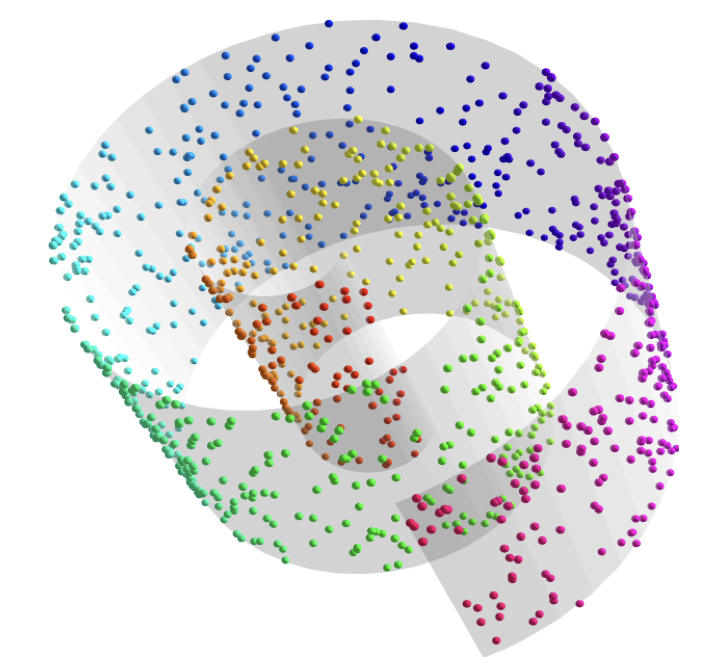
매니폴드 가설이란 어떠한 데이터라도 고차원 공간안에 있는 저차원 매니폴드안에 존재한다고 가정하는 이론.(우주 정보 구조에 대한 유력한 가정)  
(위 이미지에서 3차원 공간안에 나선형으로 2차원으로 공간이 펼쳐져 있음. 3차원안에 데이터가 2차원 공간으로 존재하는 모습)
- 머신 러닝 모델은 가능한 input공간안에서 저차원,구조적인 부분공간(잠재 매니폴드)만 학습하면 됨
- 여러 매니폴드 중 하나 안에서 두 입력 사이를 보간하는 것이 가능해야함. 즉, input data가 A에서 B로 변할 때 모든 포인트가 매니폴드에 속함

### 일반화의 원천 : 보간
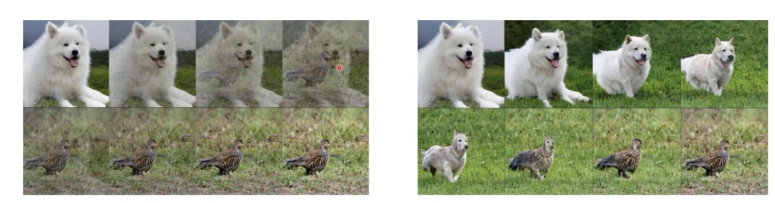
2번째 이미지는 매니폴드 보간에서 잠재 매니폴드를 통해 유효한 이미지가 되지만, 1번째 이미지는 input의 픽셀값을 선형 보간을 통해 이미지를 변형했으므로 유효하지않은 이미지가 출력됨

### 딥러닝 작동 원리
**모델이 점차 학습한 곡선을 따라 이동하는 이미지(잠재 매니폴드를 통해 이동하는 이론과 비슷)**
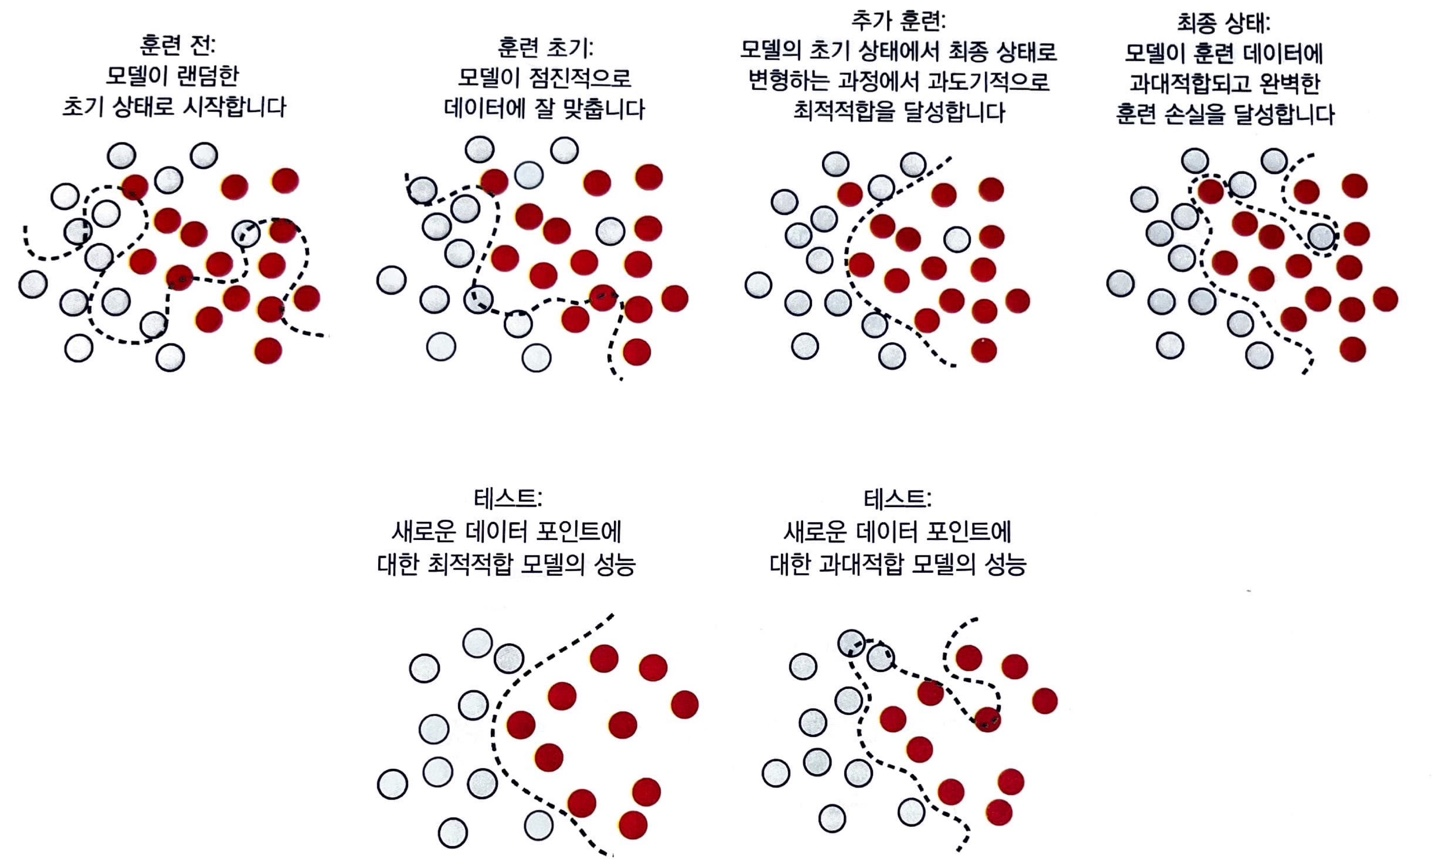  

딥러닝 모델은 고차원의 곡선으로 이루어짐. 하지만 경사하강법을 통해 점차 곡선을 데이터 포인트에 맞춰감. 결국 크고 복잡한 곡선(매니폴드)를 선택하여 Train data에 곡선이 맞을 때까지 파라미터를 조정하는 과정을 거쳐야함.
하지만 충분한 파라미터를 가지고, 지나치게 학습하게 될 경우 과대적합이 생겨 Train Data를 외워버리고 일반화가 불가능하게 됨.

### 훈련데이터의 중요성
**input data 조밀도에 따른 일반화 성능**  


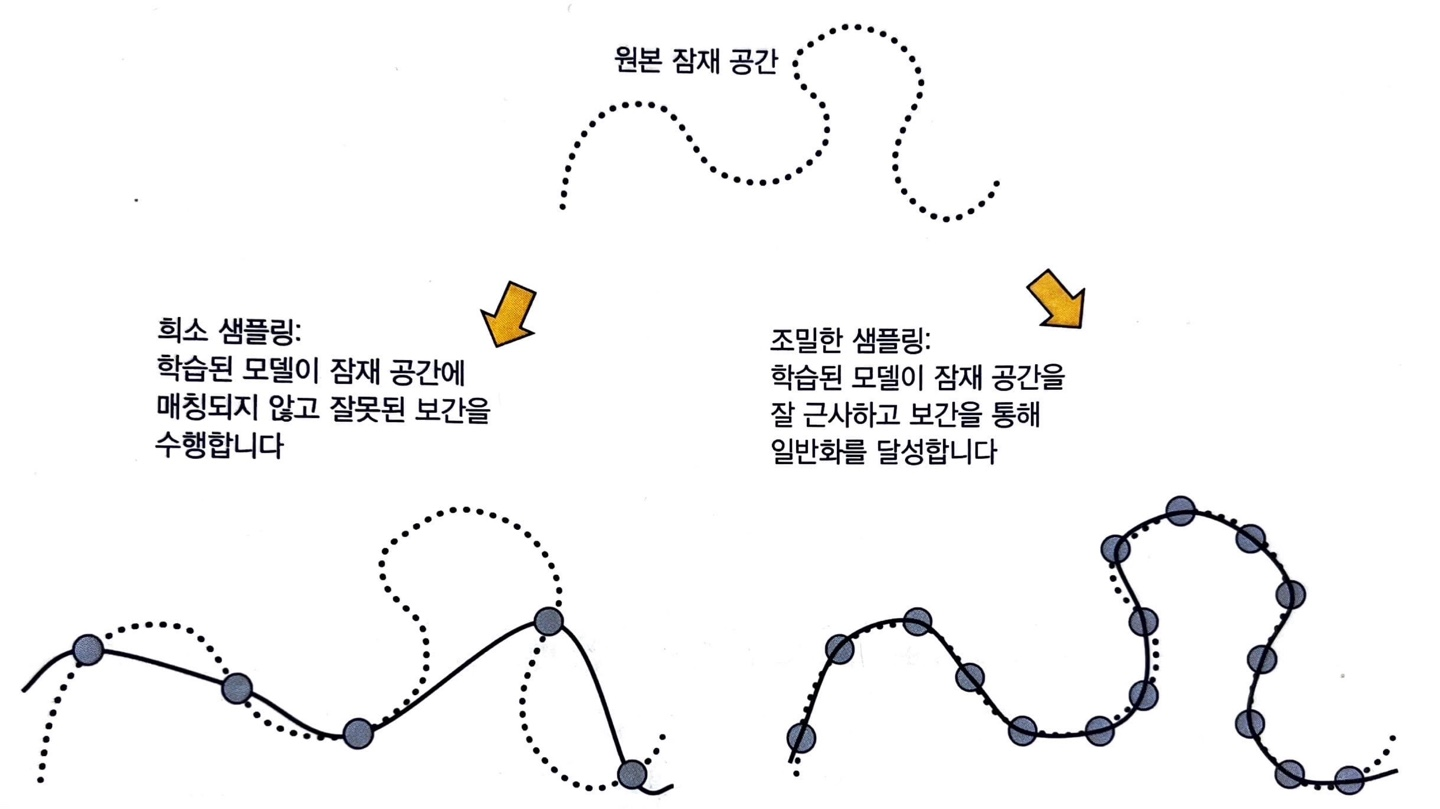
feature가 noise가 적고, input data의 공간이 더 간단하고 구조적일수록 더 일반화가 잘될 수 있음. 또한 딥러닝이 곡선을 맞추는 것이므로 모델이 이를 잘 수행하려면 input 공간이 매니폴드에 맞게 더 조밀하게 형성되어 있어야 함. 그러므로 일반화 성능을 높이는 방법은 더 많은 데이터를 훈련시켜 input data 매니폴드를 커버하는 것이라고 볼 수 있음